In [1]:
from pylab import *
from scipy.integrate import odeint
%matplotlib inline

In [32]:
def ec_mov(x_p,t,epsilon=1.):
    r32 = (x_p[0]**2+x_p[1]**2)**(1.5)
    dx = x_p[2]
    dy = x_p[3]*epsilon
    dpx = -x_p[0]/r32
    dpy = -x_p[1]/r32
    return array([dx,dy,dpx,dpy])

def energia(x_p,epsilon=1):
    r = sqrt(x_p[0]**2+x_p[1]**2)
    E=0.5*(x_p[2]**2 + epsilon*x_p[3]**2)-1/r
    return E

def cond_ini(alfa,var=0.001):
    angulo = alfa+var*(2.*rand()-1.)
    x, y = cos(angulo), sin(angulo)
    return array([x,y,1,0])

def p_rho(x_p):
    x,y,px,py = x_p[:,0],x_p[:,1],x_p[:,2],x_p[:,3]
    r=sqrt( x**2 + y**2)
    prho=(x*px+y*py)/r
    return r,prho

In [ ]:
t=arange(0,20,0.001)
eps=1
for i in range(10):
    pto_inicial = cond_ini(0)
    sol=odeint(ec_mov,pto_inicial,t,args=(eps,),atol=1e-9,rtol=1e-9)
    plot(sol[:,0],sol[:,1])
    print "E= ",energia(pto_inicial,eps), "E_f= ",energia(sol[-1],eps)
#show()
#print sol[5000]

/home/est5/anaconda2/lib/python2.7/site-packages/matplotlib/path.py:219: RuntimeWarning: invalid value encountered in isfinite
  self._has_nonfinite = not np.isfinite(self._vertices).all()
/home/est5/anaconda2/lib/python2.7/site-packages/matplotlib/transforms.py:2764: RuntimeWarning: overflow encountered in double_scalars
  elif vmax - vmin <= maxabsvalue * tiny:
/home/est5/anaconda2/lib/python2.7/site-packages/matplotlib/ticker.py:1302: RuntimeWarning: overflow encountered in double_scalars
  dv = abs(vmax - vmin)
/home/est5/anaconda2/lib/python2.7/site-packages/matplotlib/ticker.py:1410: RuntimeWarning: overflow encountered in double_scalars
  raw_step = (vmax - vmin) / nbins


ValueError: cannot convert float NaN to integer

/home/est5/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:22: RuntimeWarning: invalid value encountered in divide


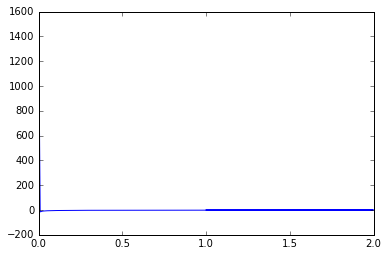

In [7]:
r,pr=p_rho(sol)
plot(r,pr)